# Importing all the Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.io
from sklearn import svm, pipeline, base, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import rbf_kernel
import functools
import os.path, zipfile
import matplotlib.pyplot as plt
import warnings
from scipy import signal
import ImportantModules
from libsvm import commonutil as cu
from libsvm import svm as lsvm
from libsvm import svmutil 

# Loading Dataset

In [2]:
# Loading DataSet

# Read DataSet BCI Competition III, DataSet IVa - Training
sub1_100hz_training = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\100 Hz\MATLAB\sub1\100Hz\data_set_IVa_aa.mat", struct_as_record=True)
sub2_100hz_training = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\100 Hz\MATLAB\sub2\100Hz\data_set_IVa_al.mat", struct_as_record=True)
sub3_100hz_training = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\100 Hz\MATLAB\sub3\100Hz\data_set_IVa_av.mat", struct_as_record=True)
sub4_100hz_training = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\100 Hz\MATLAB\sub4\100Hz\data_set_IVa_aw.mat", struct_as_record=True)
sub5_100hz_training = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\100 Hz\MATLAB\sub5\100Hz\data_set_IVa_ay.mat", struct_as_record=True)


# Read DataSet BCI Competition III, DataSet IVa - True Label
sub1_100hz_true_label = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\True Labels\true_labels_aa.mat", struct_as_record=True)
sub2_100hz_true_label = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\True Labels\true_labels_al.mat", struct_as_record=True)
sub3_100hz_true_label = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\True Labels\true_labels_av.mat", struct_as_record=True)
sub4_100hz_true_label = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\True Labels\true_labels_aw.mat", struct_as_record=True)
sub5_100hz_true_label = scipy.io.loadmat(r"C:\Users\Daksh kumar\BCI CodeBase\Relevant DataSet\Competition III\4A\True Labels\true_labels_ay.mat", struct_as_record=True)


# Function To Divide Data into 5 Anatomical Region

In [3]:
def regions(X,dt,chan_lab,events,event_lab,folds,rec_id):
    
    Regions = dict()
    Region_X = []
    Region_chan_lab = []
    Region_events1 = []
    Region_events2 = []
    Region_events3 = []
    Region_event_lab = []
    Region_folds = []
    
    for i in range(0,len(chan_lab)):
        if(chan_lab[i][0][0] == 'A' or chan_lab[i][0][0] == 'F'):
            print("F OR A")
            Region_X.append(X[i])
            Region_chan_lab.append(chan_lab[i])
            Region_event_lab.append(event_lab)
    Region_events1 = events[0]
    Region_events2 = events[1]
    Region_events3 = events[2]
    Region_folds = folds
    print(Region_X,Region_chan_lab,Region_events1,Region_events2,Region_events3,event_lab,Region_folds)
    Regions['Region1'] = {'X' :Region_X ,'chan_lab' :Region_chan_lab ,'events1' : Region_events1,'events2' : Region_events2,'events3' : Region_events3,'event_lab' :Region_event_lab ,'folds' :Region_folds }
    
    Region_X = []
    Region_chan_lab = []
    Region_events1 = []
    Region_events2 = []
    Region_events3 = []
    Region_event_lab = []
    Region_folds = []
    
    for i in range(0,len(chan_lab)):
        if(chan_lab[i][0][0] =='C'):
            print("C")
            Region_X.append(X[i])
            Region_chan_lab.append(chan_lab[i])
            Region_event_lab.append(event_lab)
    Region_events1 = events[0]
    Region_events2 = events[1]
    Region_events3 = events[2]
    Region_folds = folds
    print(Region_X,Region_chan_lab,Region_events1,Region_events2,Region_events3,event_lab,Region_folds)
    Regions['Region2'] = {'X' :Region_X ,'chan_lab' :Region_chan_lab ,'events1' : Region_events1,'events2' : Region_events2,'events3' : Region_events3,'event_lab' :Region_event_lab ,'folds' :Region_folds }
    
    Region_X = []
    Region_chan_lab = []
    Region_events1 = []
    Region_events2 = []
    Region_events3 = []
    Region_event_lab = []
    Region_folds = []
    
    for i in range(0,len(chan_lab)):
        if(chan_lab[i][0][0] =='T'):
            print("T")
            Region_X.append(X[i])
            Region_chan_lab.append(chan_lab[i])
            Region_event_lab.append(event_lab)
    Region_events1 = events[0]
    Region_events2 = events[1]
    Region_events3 = events[2]
    Region_folds = folds
    print(Region_X,Region_chan_lab,Region_events1,Region_events2,Region_events3,event_lab,Region_folds)
    Regions['Region3'] = {'X' :Region_X ,'chan_lab' :Region_chan_lab ,'events1' : Region_events1,'events2' : Region_events2,'events3' : Region_events3,'event_lab' :Region_event_lab ,'folds' :Region_folds }
    
    Region_X = []
    Region_chan_lab = []
    Region_events1 = []
    Region_events2 = []
    Region_events3 = []
    Region_event_lab = []
    Region_folds = []
    
    for i in range(0,len(chan_lab)):
        if(chan_lab[i][0][0] =='O' or chan_lab[i][0][0] =='I'):
            print("O or I")
            Region_X.append(X[i])
            Region_chan_lab.append(chan_lab[i])
            Region_event_lab.append(event_lab)
    Region_events1 = events[0]
    Region_events2 = events[1]
    Region_events3 = events[2]
    Region_folds = folds
    print(Region_X,Region_chan_lab,Region_events1,Region_events2,Region_events3,event_lab,Region_folds)
    Regions['Region4'] = {'X' :Region_X ,'chan_lab' :Region_chan_lab ,'events1' : Region_events1,'events2' : Region_events2,'events3' : Region_events3,'event_lab' :Region_event_lab ,'folds' :Region_folds }
    
    Region_X = []
    Region_chan_lab = []
    Region_events1 = []
    Region_events2 = []
    Region_events3 = []
    Region_event_lab = []
    Region_folds = []
    
    for i in range(0,len(chan_lab)):
        if(chan_lab[i][0][0] =='P'):
            print("P")
            Region_X.append(X[i])
            Region_chan_lab.append(chan_lab[i])
            Region_event_lab.append(event_lab)
    Region_events1 = events[0]
    Region_events2 = events[1]
    Region_events3 = events[2]
    Region_folds = folds
    print(Region_X,Region_chan_lab,Region_events1,Region_events2,Region_events3,event_lab,Region_folds)
    Regions['Region5'] = {'X' :Region_X ,'chan_lab' :Region_chan_lab ,'events1' : Region_events1,'events2' : Region_events2,'events3' : Region_events3,'event_lab' :Region_event_lab ,'folds' :Region_folds }
    
    return Regions
    

# Function to Make Data Readable and Execute it's Division

In [4]:
# Reading Data
def load_mat(mat_train, mat_test, rec_id):
    mat = mat_train
    mat_true = mat_test
    '''Load BCI Comp. 3.4a specific Matlab files.'''
    #mat = io.loadmat(mat_train, struct_as_record=True)
    #mat_true = io.loadmat(mat_test, struct_as_record=True)

    # get simple info from MATLAB files
    X, nfo, mrk = .1 * mat['cnt'].astype(float).T, mat['nfo'], mat['mrk']
    X, nfo, mrk = X.astype(np.float32), nfo[0][0], mrk[0][0]
    sample_rate = float((nfo['fs'])[0][0])
    dt = np.ones(X.shape[1]-1) / sample_rate
    chan_lab = [str(c[0]) for c in nfo['clab'].flatten()]

    # extract labels from both MATLAB files
    offy = mrk['pos'].flatten()
    tr_y = mrk['y'].flatten()
    all_y = mat_true['true_y'].flatten()
    assert np.all((tr_y == all_y)[np.isfinite(tr_y)]), 'labels do not match.'

    class_lab = [str(c[0]) for c in (mrk['className'])[0]]
    events = np.vstack([all_y, offy, offy + 3.5 * sample_rate]).astype(int)
    event_lab = dict(zip(np.unique(events[0]), class_lab))

    folds = np.where(np.isfinite(tr_y), -1, 1).tolist()
    
    print('Format For Printing - X,dt,chan_lab,events,event_lab,folds,rec_id')
    print(X)
    print(dt)
    print(chan_lab)
    print(events)
    print(event_lab)
    print(folds)
    print(rec_id)
    print(X[0])
    return regions(X,dt,chan_lab,events,event_lab,folds,rec_id)
    #return Necessary_Functions.Recording(X=X, dt=dt, chan_lab=chan_lab, 
    #events=events, event_lab=event_lab, folds=folds,
    #rec_id=rec_id)
    #return [X, dt, chan_lab, events, event_lab, folds]
    

In [5]:
d = load_mat(sub1_100hz_training,sub1_100hz_true_label,None)

Format For Printing - X,dt,chan_lab,events,event_lab,folds,rec_id
[[194.6 185.6 198.3 ...  11.2   3.3  15. ]
 [191.3 341.2 203.4 ... -68.1 -75.  -72.6]
 [ 81.5  77.3  86.2 ... -34.5 -37.2 -32.7]
 ...
 [330.  303.1 298.7 ... -40.4 -37.7 -37.1]
 [339.5 314.6 310.  ... -53.3 -52.3 -52.8]
 [301.4 274.1 269.9 ... -57.4 -51.2 -53.2]]
[0.01 0.01 0.01 ... 0.01 0.01 0.01]
['Fp1', 'AFp1', 'Fpz', 'AFp2', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'FAF5', 'FAF1', 'FAF2', 'FAF6', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FFC7', 'FFC5', 'FFC3', 'FFC1', 'FFC2', 'FFC4', 'FFC6', 'FFC8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'PCP7', 'PCP5', 'PCP3', 'PCP1', 'PCP2', 'PCP4', 'PCP6', 'PCP8', 'P9', 'P7', 'P5'

# Extracting Some More Useful Data

In [6]:
# SciPy.io.loadmat does not deal well with Matlab structures, resulting in lots of
# extra dimensions in the arrays. This makes the code a bit more cluttered


m = sub1_100hz_training



sample_rate = m['nfo']['fs'][0][0][0][0]
#EEG = m['cnt'].T
#nchannels_yt, nsamples_yt = EEG.shape

#channel_names = [s[0] for s in m['nfo']['clab'][0][0][0]]
event_onsets = m['mrk'][0][0][0]
event_codes = m['mrk'][0][0][1]
#labels = np.zeros((1, nsamples), int)
#labels[0, event_onsets] = event_codes

cl_lab = [s[0] for s in m['mrk']['className'][0][0][0]]
cl1 = cl_lab[0]
cl2 = cl_lab[1]
nclasses = len(cl_lab)
nevents = len(event_onsets)

In [7]:
# LogVar Function

In [8]:
# Index Guide - Region1_cnt,Region1_dt,Region1_chan_lab,Region1_events1,Region1_events2,Region1_events3,Region1_event_lab,Region1_folds,Region1_rec_id
# 0 - cnt, 1 - dt,2 - chan_lab, 3 - events1, 4 - events2, 5 - events3, 6 - event_lab, 7 - folds, 8 - rec_id

In [9]:
# Extracting Offsets

In [10]:
# extract trials, 100 = Sample Rate
offsets = np.array([0.5 * 100, np.median(np.array(d['Region1']['events3']) - np.array(d['Region1']['events2']))])
#offsets1 = np.array((0.5, 3.3))
print ('Extracting interval of'+str(offsets / 100) + ' sec from trial start.') 

sample_rate = 100

Extracting interval of[0.5 3.5] sec from trial start.


In [11]:
# The time window (in samples) to extract for each trial, here 0.5 -- 3.5 seconds
win = np.arange(int(0.5*sample_rate), int(3.5*sample_rate))
nsamples = len(win)

# Extract Trials from Region 1 to 5

In [12]:
trials_region1 = ImportantModules.ExtractTrial(d['Region1']['X'],event_onsets,sample_rate,cl_lab,event_codes)
trials_region2 = ImportantModules.ExtractTrial(d['Region2']['X'],event_onsets,sample_rate,cl_lab,event_codes)
trials_region3 = ImportantModules.ExtractTrial(d['Region3']['X'],event_onsets,sample_rate,cl_lab,event_codes)
trials_region4 = ImportantModules.ExtractTrial(d['Region4']['X'],event_onsets,sample_rate,cl_lab,event_codes)
trials_region5 = ImportantModules.ExtractTrial(d['Region5']['X'],event_onsets,sample_rate,cl_lab,event_codes)

(1, 280)
41 298458
['right', 'foot']
300
[ 1.  2. nan]
right 1.0
[  4748   5282   8621   9180   9761  12006  16453  20820  24666  26324
  26859  27430  29091  30782  33545  34114  36798  37944  39637  41887
  42995  48511  49068  49605  50185  55611  56181  56736  58953  60629
  62328  63440  63985  65076  67905  78384  79507  81765  82307  83394
  85655  86202 110488 111618 112727 114357 114924 116579 117678 118251
 119911 126451 127013 130432 132666 134930 136558 137143 139833 140381
 141532 142632 143729 144273 145346 147585 148156 149280 153148 155885
 166774 167870 172880 174540 175120 175691 178933 181136 182831 186149]
foot 2.0
[  6954  10341  11446  12547  13650  14773  15875  17565  21366  24125
  27992  28538  29625  30205  31329  31890  32997  37360  39059  43554
  44119  45772  46332  47955  52834  53937  54480  59517  60052  61205
  61773  62866  65625  66779  68462  76683  77219  80641  82856  83947
  85078  86736  87271  87833  88977 107677 108767 109335 111069 112165
 1

In [13]:
# Some information about the dimensionality of the data (channels x time x trials)
print('Shape of trials_region1[cl1]:', trials_region1[cl1].shape)
print('Shape of trials_region1[cl2]:', trials_region1[cl2].shape)

# Some information about the dimensionality of the data (channels x time x trials)
print('Shape of trials_region2[cl1]:', trials_region2[cl1].shape)
print('Shape of trials_region2[cl2]:', trials_region2[cl2].shape)

# Some information about the dimensionality of the data (channels x time x trials)
print('Shape of trials_region3[cl1]:', trials_region3[cl1].shape)
print('Shape of trials_region3[cl2]:', trials_region3[cl2].shape)

# Some information about the dimensionality of the data (channels x time x trials)
print('Shape of trials_region4[cl1]:', trials_region4[cl1].shape)
print('Shape of trials_region4[cl2]:', trials_region4[cl2].shape)

# Some information about the dimensionality of the data (channels x time x trials)
print('Shape of trials_region5[cl1]:', trials_region5[cl1].shape)
print('Shape of trials_region5[cl2]:', trials_region5[cl2].shape)



Shape of trials_region1[cl1]: (41, 300, 80)
Shape of trials_region1[cl2]: (41, 300, 88)
Shape of trials_region2[cl1]: (30, 300, 80)
Shape of trials_region2[cl2]: (30, 300, 88)
Shape of trials_region3[cl1]: (6, 300, 80)
Shape of trials_region3[cl2]: (6, 300, 88)
Shape of trials_region4[cl1]: (9, 300, 80)
Shape of trials_region4[cl2]: (9, 300, 88)
Shape of trials_region5[cl1]: (32, 300, 80)
Shape of trials_region5[cl2]: (32, 300, 88)


# Applying Band Pass Filter to the Data

In [14]:
# Apply the function
trials_filt_region1 = {cl1: ImportantModules.bandpass(trials_region1[cl1], 5, 20, sample_rate),
               cl2: ImportantModules.bandpass(trials_region1[cl2], 5, 20, sample_rate)}


# Apply the function
trials_filt_region2 = {cl1: ImportantModules.bandpass(trials_region2[cl1], 5, 20, sample_rate),
               cl2: ImportantModules.bandpass(trials_region2[cl2], 5, 20, sample_rate)}


# Apply the function
trials_filt_region3 = {cl1: ImportantModules.bandpass(trials_region3[cl1], 5, 20, sample_rate),
               cl2: ImportantModules.bandpass(trials_region3[cl2], 5, 20, sample_rate)}

# Apply the function
trials_filt_region4 = {cl1: ImportantModules.bandpass(trials_region4[cl1], 5, 20, sample_rate),
               cl2: ImportantModules.bandpass(trials_region4[cl2], 5, 20, sample_rate)}

# Apply the function
trials_filt_region5 = {cl1: ImportantModules.bandpass(trials_region5[cl1], 5, 20, sample_rate),
               cl2: ImportantModules.bandpass(trials_region5[cl2], 5, 20, sample_rate)}


In [15]:
from numpy import linalg

def scov(trials,k):
    ''' Calculate the covariance for each trial and return their average '''
    ntrials = trials.shape[2]
    print(ntrials)
    covs = [ trials[:,:,i].dot(trials[:,:,i].T) / nsamples for i in range(ntrials) ]
    # Creating Chunks
    chunk = trials[:,:,:k]
    nchunks = chunk.shape[2]
    print(chunk.shape)
    chunk_covs = []
    chunk_covs = [ chunk[:,:,i].dot(chunk[:,:,i].T) / nsamples for i in range(nchunks) ]
    
    return np.mean(covs, axis=0),np.mean(chunk_covs, axis=0)

def whitening(sigma):
    ''' Calculate a whitening matrix for covariance matrix sigma. '''
    U, l, _ = linalg.svd(sigma)
    return U.dot( np.diag(l ** -0.5) )

def scsp(trials_r, trials_f,mu = 0.5,k = 3):
    '''
    Calculate the CSP transformation matrix W.
    arguments:
        trials_r - Array (channels x samples x trials) containing right hand movement trials
        trials_f - Array (channels x samples x trials) containing foot movement trials
    returns:
        Mixing matrix W
    '''
    cov_r,chunk_r = scov(trials_r,k)
    cov_f,chunk_f = scov(trials_f,k)
    del_r = abs(chunk_r-cov_r)
    del_f = abs(chunk_f-cov_f)
    del_r = del_r/k
    del_f = del_f/k
    print("Print chunk_r and chunk_f shape")
    print(chunk_r.shape,chunk_f.shape)
    print("Print Cov_r and Cov_f shape")
    print(cov_r.shape,cov_f.shape)
    P = whitening(cov_r + cov_f + mu*(del_r + del_f) )
    B, _, _ = linalg.svd( P.T.dot(cov_f).dot(P) )
    W = P.dot(B)
    return W

def apply_mix(W, trials,shapevar):
    ''' Apply a mixing matrix to each trial (basically multiply W with the EEG signal matrix)'''
    ntrials = trials.shape[2]
    nchannels, _ = shapevar.shape
    trials_csp = np.zeros((nchannels, nsamples, ntrials))
    print(trials_csp.shape)
    for i in range(ntrials):
        trials_csp[:,:,i] = W.T.dot(trials[:,:,i])
    return trials_csp

# Apply SCSP to the Filtered Data

In [16]:
mu = 0.05
k = 3

# Apply the CSP functions
W_region1 = scsp(trials_filt_region1[cl1], trials_filt_region1[cl2],mu,k)
print(W_region1.shape,trials_filt_region1[cl1].shape, trials_filt_region1[cl2].shape)
SCSP_region1 = {cl1: apply_mix(W_region1, trials_filt_region1[cl1],np.array(d['Region1']['X'])),
              cl2: apply_mix(W_region1, trials_filt_region1[cl2],np.array(d['Region1']['X']))}



# Apply the functions
W_region2 = scsp(trials_filt_region2[cl1], trials_filt_region2[cl2],mu,k)
print(W_region2.shape,trials_filt_region2[cl1].shape, trials_filt_region2[cl2].shape)
SCSP_region2 = {cl1: apply_mix(W_region2, trials_filt_region2[cl1],np.array(d['Region2']['X'])),
              cl2: apply_mix(W_region2, trials_filt_region2[cl2],np.array(d['Region2']['X']))}



# Apply the functions
W_region3 = scsp(trials_filt_region3[cl1], trials_filt_region3[cl2],mu,k)
print(W_region3.shape,trials_filt_region3[cl1].shape, trials_filt_region3[cl2].shape)
SCSP_region3 = {cl1: apply_mix(W_region3, trials_filt_region3[cl1],np.array(d['Region3']['X'])),
              cl2: apply_mix(W_region3, trials_filt_region3[cl2],np.array(d['Region3']['X']))}



# Apply the functions
W_region4 = scsp(trials_filt_region4[cl1], trials_filt_region4[cl2],mu,k)
print(W_region4.shape,trials_filt_region4[cl1].shape, trials_filt_region4[cl2].shape)
SCSP_region4 = {cl1: apply_mix(W_region4, trials_filt_region4[cl1],np.array(d['Region4']['X'])),
              cl2: apply_mix(W_region4, trials_filt_region4[cl2],np.array(d['Region4']['X']))}



# Apply the functions
W_region5 = scsp(trials_filt_region5[cl1], trials_filt_region5[cl2],mu,k)
print(W_region5.shape,trials_filt_region5[cl1].shape, trials_filt_region5[cl2].shape)
SCSP_region5 = {cl1: apply_mix(W_region5, trials_filt_region5[cl1],np.array(d['Region5']['X'])),
              cl2: apply_mix(W_region5, trials_filt_region5[cl2],np.array(d['Region5']['X']))}

80
(41, 300, 3)
88
(41, 300, 3)
Print chunk_r and chunk_f shape
(41, 41) (41, 41)
Print Cov_r and Cov_f shape
(41, 41) (41, 41)
(41, 41) (41, 300, 80) (41, 300, 88)
(41, 300, 80)
(41, 300, 88)
80
(30, 300, 3)
88
(30, 300, 3)
Print chunk_r and chunk_f shape
(30, 30) (30, 30)
Print Cov_r and Cov_f shape
(30, 30) (30, 30)
(30, 30) (30, 300, 80) (30, 300, 88)
(30, 300, 80)
(30, 300, 88)
80
(6, 300, 3)
88
(6, 300, 3)
Print chunk_r and chunk_f shape
(6, 6) (6, 6)
Print Cov_r and Cov_f shape
(6, 6) (6, 6)
(6, 6) (6, 300, 80) (6, 300, 88)
(6, 300, 80)
(6, 300, 88)
80
(9, 300, 3)
88
(9, 300, 3)
Print chunk_r and chunk_f shape
(9, 9) (9, 9)
Print Cov_r and Cov_f shape
(9, 9) (9, 9)
(9, 9) (9, 300, 80) (9, 300, 88)
(9, 300, 80)
(9, 300, 88)
80
(32, 300, 3)
88
(32, 300, 3)
Print chunk_r and chunk_f shape
(32, 32) (32, 32)
Print Cov_r and Cov_f shape
(32, 32) (32, 32)
(32, 32) (32, 300, 80) (32, 300, 88)
(32, 300, 80)
(32, 300, 88)


# Plot LogVar to Data Before CSP

41
30
6
9
32


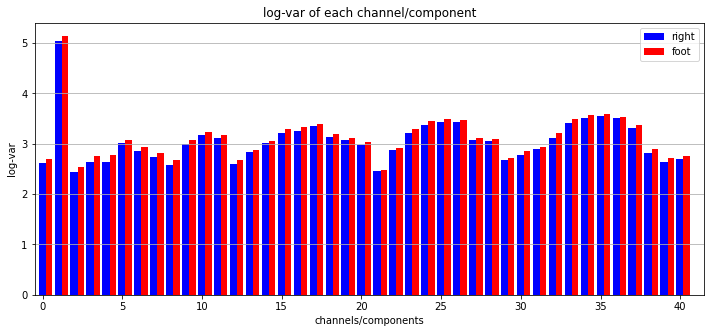

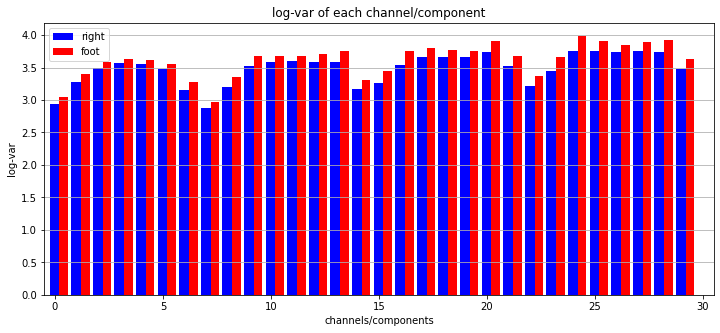

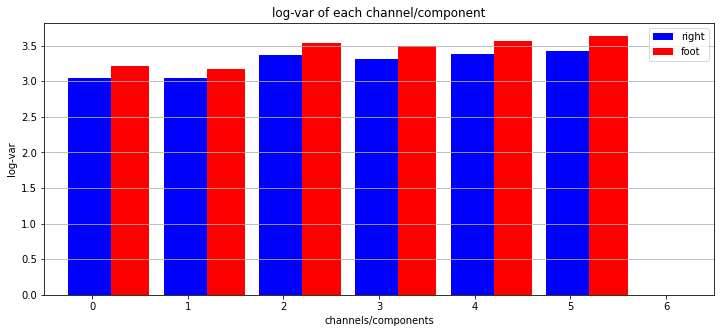

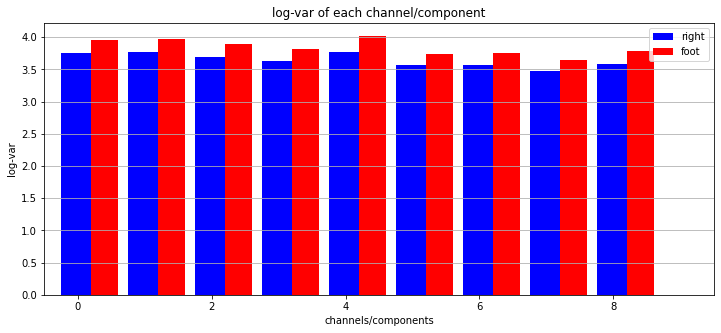

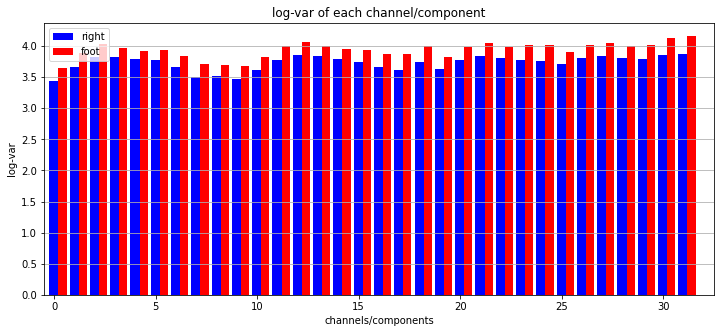

In [17]:
# Before CSP

# Apply Log Var

# Apply the function
trials_logvar1 = {cl1: ImportantModules.logvar(trials_filt_region1[cl1]),
                 cl2: ImportantModules.logvar(trials_filt_region1[cl2])}


# Plot the log-vars
ImportantModules.plot_logvar(trials_logvar1,np.array(d['Region1']['X']))


# Apply Log Var

# Apply the function
trials_logvar2 = {cl1: ImportantModules.logvar(trials_filt_region2[cl1]),
                 cl2: ImportantModules.logvar(trials_filt_region2[cl2])}


# Plot the log-vars
ImportantModules.plot_logvar(trials_logvar2,np.array(d['Region2']['X']))


# Apply Log Var

# Apply the function
trials_logvar3 = {cl1: ImportantModules.logvar(trials_filt_region3[cl1]),
                 cl2: ImportantModules.logvar(trials_filt_region3[cl2])}


# Plot the log-vars
ImportantModules.plot_logvar(trials_logvar3,np.array(d['Region3']['X']))



# Apply Log Var

# Apply the function
trials_logvar4 = {cl1: ImportantModules.logvar(trials_filt_region4[cl1]),
                 cl2: ImportantModules.logvar(trials_filt_region4[cl2])}


# Plot the log-vars
ImportantModules.plot_logvar(trials_logvar4,np.array(d['Region4']['X']))



# Apply Log Var

# Apply the function
trials_logvar5 = {cl1: ImportantModules.logvar(trials_filt_region5[cl1]),
                 cl2: ImportantModules.logvar(trials_filt_region5[cl2])}


# Plot the log-vars
ImportantModules.plot_logvar(trials_logvar5,np.array(d['Region5']['X']))

# Plot ScatterPlot Before CSP

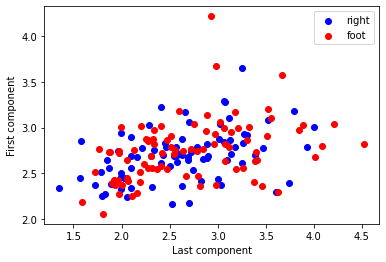

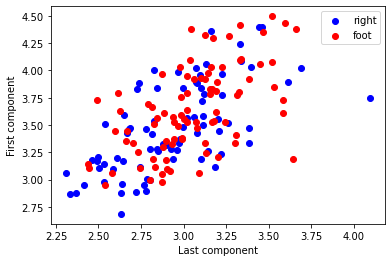

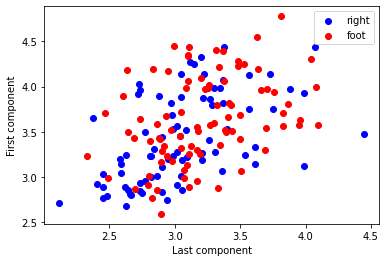

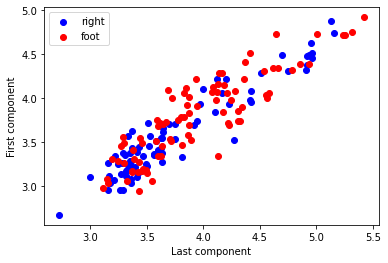

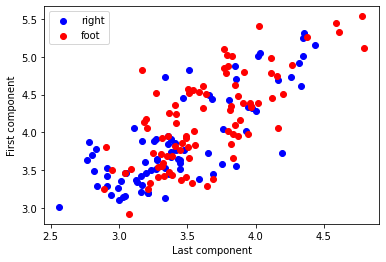

In [18]:
# Region 1
ImportantModules.plot_scatter(trials_logvar1[cl1], trials_logvar1[cl2])


# Region 2
ImportantModules.plot_scatter(trials_logvar2[cl1], trials_logvar2[cl2])


# Region 3
ImportantModules.plot_scatter(trials_logvar3[cl1], trials_logvar3[cl2])

# Region 4
ImportantModules.plot_scatter(trials_logvar4[cl1], trials_logvar4[cl2])


# Region 5
ImportantModules.plot_scatter(trials_logvar5[cl1], trials_logvar5[cl2])

# Plot LogVar to Data After SCSP

41
30
6
9
32


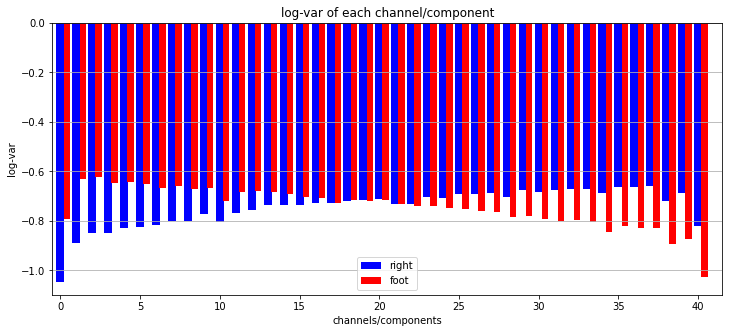

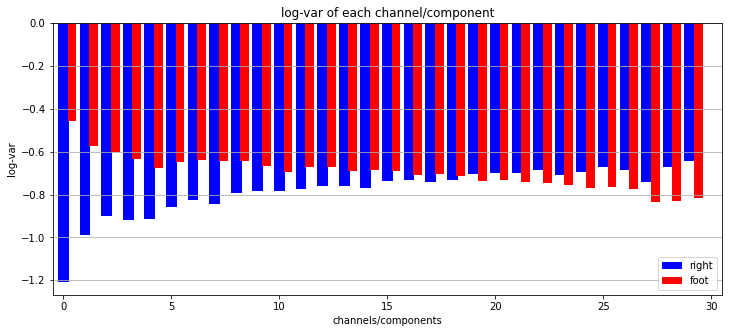

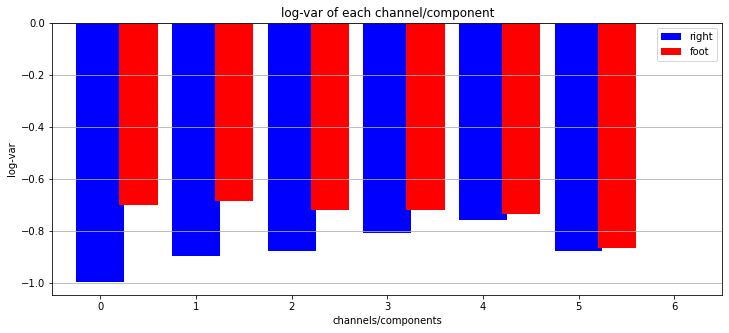

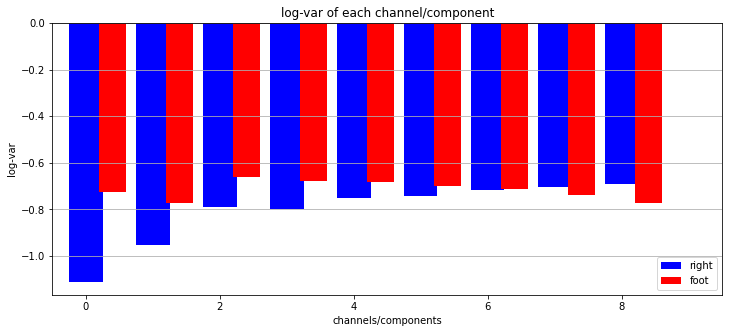

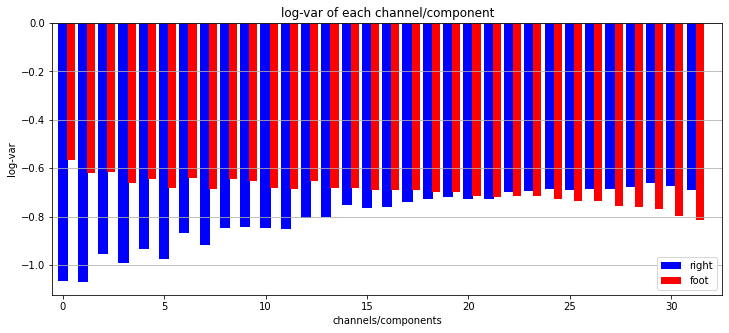

In [19]:
# After CSP

## To see the result of the CSP algorithm, we plot the log-var like we did before:

trials_logvar1 = {cl1: ImportantModules.logvar(SCSP_region1[cl1]),
                 cl2: ImportantModules.logvar(SCSP_region1[cl2])}
ImportantModules.plot_logvar(trials_logvar1,np.array(d['Region1']['X']))


trials_logvar2 = {cl1: ImportantModules.logvar(SCSP_region2[cl1]),
                 cl2: ImportantModules.logvar(SCSP_region2[cl2])}
ImportantModules.plot_logvar(trials_logvar2,np.array(d['Region2']['X']))


trials_logvar3 = {cl1: ImportantModules.logvar(SCSP_region3[cl1]),
                 cl2: ImportantModules.logvar(SCSP_region3[cl2])}
ImportantModules.plot_logvar(trials_logvar3,np.array(d['Region3']['X']))


trials_logvar4 = {cl1: ImportantModules.logvar(SCSP_region4[cl1]),
                 cl2: ImportantModules.logvar(SCSP_region4[cl2])}
ImportantModules.plot_logvar(trials_logvar4,np.array(d['Region4']['X']))


trials_logvar5 = {cl1: ImportantModules.logvar(SCSP_region5[cl1]),
                 cl2: ImportantModules.logvar(SCSP_region5[cl2])}
ImportantModules.plot_logvar(trials_logvar5,np.array(d['Region5']['X']))




# Plot ScatterPlot After SCSP

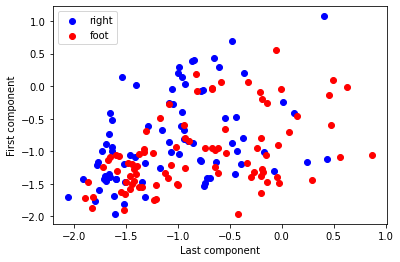

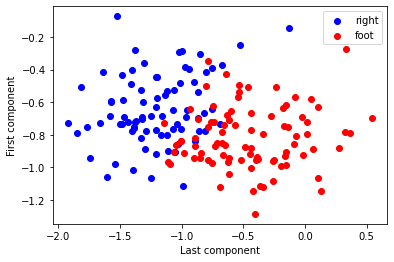

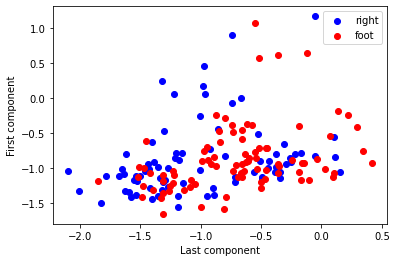

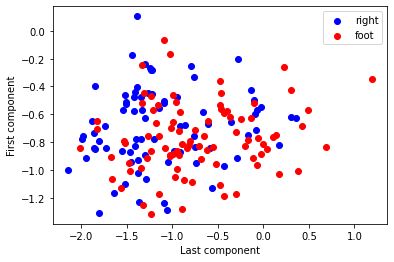

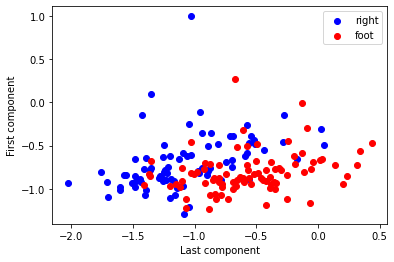

In [20]:
# Region 1
ImportantModules.plot_scatter(trials_logvar1[cl1], trials_logvar1[cl2])


# Region 2
ImportantModules.plot_scatter(trials_logvar2[cl1], trials_logvar2[cl2])


# Region 3
ImportantModules.plot_scatter(trials_logvar3[cl1], trials_logvar3[cl2])

# Region 4
ImportantModules.plot_scatter(trials_logvar4[cl1], trials_logvar4[cl2])


# Region 5
ImportantModules.plot_scatter(trials_logvar5[cl1], trials_logvar5[cl2])

# Manual Division of Training, Testing Data

In [89]:

mu = 0.5
k = 3

# Apply the CSP functions
W_region1 = scsp(trials_filt_region1[cl1], trials_filt_region1[cl2],mu,k)
print(W_region1.shape,trials_filt_region1[cl1].shape, trials_filt_region1[cl2].shape)
SCSP_region1 = {cl1: apply_mix(W_region1, trials_filt_region1[cl1],np.array(d['Region1']['X'])),
              cl2: apply_mix(W_region1, trials_filt_region1[cl2],np.array(d['Region1']['X']))}



# Apply the functions
W_region2 = scsp(trials_filt_region2[cl1], trials_filt_region2[cl2],mu,k)
print(W_region2.shape,trials_filt_region2[cl1].shape, trials_filt_region2[cl2].shape)
SCSP_region2 = {cl1: apply_mix(W_region2, trials_filt_region2[cl1],np.array(d['Region2']['X'])),
              cl2: apply_mix(W_region2, trials_filt_region2[cl2],np.array(d['Region2']['X']))}



# Apply the functions
W_region3 = scsp(trials_filt_region3[cl1], trials_filt_region3[cl2],mu,k)
print(W_region3.shape,trials_filt_region3[cl1].shape, trials_filt_region3[cl2].shape)
SCSP_region3 = {cl1: apply_mix(W_region3, trials_filt_region3[cl1],np.array(d['Region3']['X'])),
              cl2: apply_mix(W_region3, trials_filt_region3[cl2],np.array(d['Region3']['X']))}



# Apply the functions
W_region4 = scsp(trials_filt_region4[cl1], trials_filt_region4[cl2],mu,k)
print(W_region4.shape,trials_filt_region4[cl1].shape, trials_filt_region4[cl2].shape)
SCSP_region4 = {cl1: apply_mix(W_region4, trials_filt_region4[cl1],np.array(d['Region4']['X'])),
              cl2: apply_mix(W_region4, trials_filt_region4[cl2],np.array(d['Region4']['X']))}



# Apply the functions
W_region5 = scsp(trials_filt_region5[cl1], trials_filt_region5[cl2],mu,k)
print(W_region5.shape,trials_filt_region5[cl1].shape, trials_filt_region5[cl2].shape)
SCSP_region5 = {cl1: apply_mix(W_region5, trials_filt_region5[cl1],np.array(d['Region5']['X'])),
              cl2: apply_mix(W_region5, trials_filt_region5[cl2],np.array(d['Region5']['X']))}

80
(41, 300, 3)
88
(41, 300, 3)
Print chunk_r and chunk_f shape
(41, 41) (41, 41)
Print Cov_r and Cov_f shape
(41, 41) (41, 41)
(41, 41) (41, 300, 80) (41, 300, 88)
(41, 300, 80)
(41, 300, 88)
80
(30, 300, 3)
88
(30, 300, 3)
Print chunk_r and chunk_f shape
(30, 30) (30, 30)
Print Cov_r and Cov_f shape
(30, 30) (30, 30)
(30, 30) (30, 300, 80) (30, 300, 88)
(30, 300, 80)
(30, 300, 88)
80
(6, 300, 3)
88
(6, 300, 3)
Print chunk_r and chunk_f shape
(6, 6) (6, 6)
Print Cov_r and Cov_f shape
(6, 6) (6, 6)
(6, 6) (6, 300, 80) (6, 300, 88)
(6, 300, 80)
(6, 300, 88)
80
(9, 300, 3)
88
(9, 300, 3)
Print chunk_r and chunk_f shape
(9, 9) (9, 9)
Print Cov_r and Cov_f shape
(9, 9) (9, 9)
(9, 9) (9, 300, 80) (9, 300, 88)
(9, 300, 80)
(9, 300, 88)
80
(32, 300, 3)
88
(32, 300, 3)
Print chunk_r and chunk_f shape
(32, 32) (32, 32)
Print Cov_r and Cov_f shape
(32, 32) (32, 32)
(32, 32) (32, 300, 80) (32, 300, 88)
(32, 300, 80)
(32, 300, 88)


In [90]:
# Creating Useable CSPing and Testing Data

SCSP_region1 = np.dstack((SCSP_region1[cl1],SCSP_region1[cl2]))

SCSP_region2 = np.dstack((SCSP_region2[cl1],SCSP_region2[cl2]))

SCSP_region3 = np.dstack((SCSP_region3[cl1],SCSP_region3[cl2]))

SCSP_region4 = np.dstack((SCSP_region4[cl1],SCSP_region4[cl2]))

SCSP_region5 = np.dstack((SCSP_region5[cl1],SCSP_region5[cl2]))




In [91]:
class ChanVar(base.BaseEstimator, base.TransformerMixin):
    def fit( X, y):return X,y
    def transform(X):
        return np.var(X, axis=1)  # X.shape = (trials, channels, time)
    

In [92]:
# ChanVar Transform

# Finding their Variance 

SCSP_Region1Var = ChanVar.transform(SCSP_region1)

SCSP_Region2Var = ChanVar.transform(SCSP_region2)

SCSP_Region3Var = ChanVar.transform(SCSP_region3)

SCSP_Region4Var = ChanVar.transform(SCSP_region4)

SCSP_Region5Var = ChanVar.transform(SCSP_region5)

print(SCSP_Region1Var.shape,SCSP_Region2Var.shape,SCSP_Region3Var.shape,SCSP_Region4Var.shape,SCSP_Region5Var.shape)

(41, 168) (30, 168) (6, 168) (9, 168) (32, 168)


In [93]:
# Creating Data Data
X_SCSP_Region1 = SCSP_Region1Var.T
X_SCSP_Region2 = SCSP_Region2Var.T
X_SCSP_Region3 = SCSP_Region3Var.T
X_SCSP_Region4 = SCSP_Region4Var.T
X_SCSP_Region5 = SCSP_Region5Var.T
print(X_SCSP_Region1.shape,X_SCSP_Region2.shape,X_SCSP_Region3.shape,X_SCSP_Region4.shape,X_SCSP_Region5.shape)

X_SCSP = np.hstack((X_SCSP_Region1,X_SCSP_Region2,X_SCSP_Region3,X_SCSP_Region4,X_SCSP_Region5))
print(X_SCSP.shape)

(168, 41) (168, 30) (168, 6) (168, 9) (168, 32)
(168, 118)


In [94]:
# Create Y Labels


y_1 = np.zeros(trials_filt_region1[cl1].shape[2])
y_1.fill(1)
y_2 = np.zeros(trials_filt_region1[cl2].shape[2])
y_2.fill(-1)
y = np.hstack((y_1,y_2))
#train_region1_combT = np.transpose(train_region1_comb,(2,1,0))
print(y.shape)
y




(168,)


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_SCSP,y,test_size=0.33,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(112, 118) (56, 118) (112,) (56,)


In [96]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_SCSP_Region1,y,test_size=0.33,random_state=42)
print(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape)

(112, 41) (56, 41) (112,) (56,)


In [97]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_SCSP_Region2,y,test_size=0.33,random_state=42)
print(X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape)

(112, 30) (56, 30) (112,) (56,)


In [98]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_SCSP_Region3,y,test_size=0.33,random_state=42)
print(X_train3.shape,X_test3.shape,y_train3.shape,y_test3.shape)

(112, 6) (56, 6) (112,) (56,)


In [99]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_SCSP_Region4,y,test_size=0.33,random_state=42)
print(X_train4.shape,X_test4.shape,y_train4.shape,y_test4.shape)

(112, 9) (56, 9) (112,) (56,)


In [100]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_SCSP_Region5,y,test_size=0.33,random_state=42)
print(X_train5.shape,X_test5.shape,y_train5.shape,y_test5.shape)

(112, 32) (56, 32) (112,) (56,)


In [101]:
model = svm.SVC(kernel='rbf',gamma=1,shrinking=False)
model.fit(X_train,y_train)

SVC(gamma=1, shrinking=False)

In [102]:
model1 = svm.SVC(kernel='rbf',gamma=1,shrinking=False)
model1.fit(X_train1,y_train1)

model2 = svm.SVC(kernel='rbf',gamma=1,shrinking=False)
model2.fit(X_train2,y_train2)

model3 = svm.SVC(kernel='rbf',gamma=1,shrinking=False)
model3.fit(X_train3,y_train3)

model4 = svm.SVC(kernel='rbf',gamma=1,shrinking=False)
model4.fit(X_train4,y_train4)

model5 = svm.SVC(kernel='rbf',gamma=1,shrinking=False)
model5.fit(X_train5,y_train5)

SVC(gamma=1, shrinking=False)

In [103]:
y_pred = model.predict(X_test)

In [104]:
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.76      1.00      0.87        29
         1.0       1.00      0.67      0.80        27

    accuracy                           0.84        56
   macro avg       0.88      0.83      0.83        56
weighted avg       0.88      0.84      0.83        56



In [105]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8392857142857143

In [106]:
# Caculating Respective W, Alpha*Y

In [107]:
Kernel = rbf_kernel(X_train)
Kernel.shape

Kernel1 = rbf_kernel(X_train1.T)
Kernel2 = rbf_kernel(X_train2.T)
Kernel3 = rbf_kernel(X_train3.T)
Kernel4 = rbf_kernel(X_train4.T)
Kernel5 = rbf_kernel(X_train5.T)

In [108]:
alpha1 = np.mean(model1.support_vectors_,axis = 0)
alpha1.resize((1,Kernel1.shape[1]))
print(alpha1.shape)


alpha2 = np.mean(model2.support_vectors_,axis = 0)
alpha2.resize((1,Kernel2.shape[1]))
print(alpha2.shape)


alpha3 = np.mean(model3.support_vectors_,axis = 0)
alpha3.resize((1,Kernel3.shape[1]))
print(alpha3.shape)


alpha4 = np.mean(model4.support_vectors_,axis = 0)
alpha4.resize((1,Kernel4.shape[1]))
print(alpha4.shape)


alpha5 = np.mean(model5.support_vectors_,axis = 0)
alpha5.resize((1,Kernel5.shape[1]))
print(alpha5.shape)

(1, 41)
(1, 30)
(1, 6)
(1, 9)
(1, 32)


In [109]:
# Calculating Quadtratic Norms

Q = {
  'Region1' : np.dot(alpha1,(np.dot(Kernel1,alpha1.T))),
  'Region2' : np.dot(alpha2,(np.dot(Kernel2,alpha2.T))),
  'Region3' : np.dot(alpha3,(np.dot(Kernel3,alpha3.T))),
  'Region4' : np.dot(alpha4,(np.dot(Kernel4,alpha4.T))),
  'Region5' : np.dot(alpha5,(np.dot(Kernel5,alpha5.T)))
    }

In [110]:
Q_sorted = {k: v for k, v in sorted(Q.items(), key=lambda item: item[1],reverse=True)}
Q_sorted

{'Region1': array([[379.68497928]]),
 'Region5': array([[236.57991364]]),
 'Region2': array([[213.97782779]]),
 'Region4': array([[18.28994662]]),
 'Region3': array([[7.41484575]])}

alpha1 = (model1.dual_coef_)
alpha1.resize((1,Kernel1.shape[1]),refcheck=False)
print(alpha1.shape)



alpha2 = (model2.dual_coef_)
alpha2.resize((1,Kernel2.shape[1]),refcheck=False)
print(alpha2.shape)


alpha3 = (model3.dual_coef_)
alpha3.resize((1,Kernel3.shape[1]),refcheck=False)
print(alpha3.shape)


alpha4 = (model4.dual_coef_)
alpha4.resize((1,Kernel4.shape[1]),refcheck=False)
print(alpha4.shape)


alpha5 = (model5.dual_coef_)
alpha5.resize((1,Kernel5.shape[1]),refcheck=False)
print(alpha5.shape)

In [43]:
# Divide Data
# Extract Features Using Trial Extraction, BPF, CSP and all
# Composite Kernel Kardo
# SVM Lagake Classification Kardo
# Compute Quadratic Norm and Remove the Least Relevant Region
# Repeat until No. of Regions/Kernel Left = 1

# Divide into Training, Testing Data

# Percentage of trials to use for training (50-50 split here)
train_percentage = 0.7

# Calculate the number of trials for each class the above percentage boils down to
ntrain_r_region1 = int(trials_filt_region1[cl1].shape[2] * train_percentage)
ntrain_f_region1 = int(trials_filt_region1[cl2].shape[2] * train_percentage)
ntest_r_region1 = trials_filt_region1[cl1].shape[2] - ntrain_r_region1
ntest_f_region1 = trials_filt_region1[cl2].shape[2] - ntrain_f_region1

# Calculate the number of trials for each class the above percentage boils down to
ntrain_r_region2 = int(trials_filt_region2[cl1].shape[2] * train_percentage)
ntrain_f_region2 = int(trials_filt_region2[cl2].shape[2] * train_percentage)
ntest_r_region2 = trials_filt_region2[cl1].shape[2] - ntrain_r_region2
ntest_f_region2 = trials_filt_region2[cl2].shape[2] - ntrain_f_region2


# Calculate the number of trials for each class the above percentage boils down to
ntrain_r_region3 = int(trials_filt_region3[cl1].shape[2] * train_percentage)
ntrain_f_region3 = int(trials_filt_region3[cl2].shape[2] * train_percentage)
ntest_r_region3 = trials_filt_region3[cl1].shape[2] - ntrain_r_region3
ntest_f_region3 = trials_filt_region3[cl2].shape[2] - ntrain_f_region3


# Calculate the number of trials for each class the above percentage boils down to
ntrain_r_region4 = int(trials_filt_region4[cl1].shape[2] * train_percentage)
ntrain_f_region4 = int(trials_filt_region4[cl2].shape[2] * train_percentage)
ntest_r_region4 = trials_filt_region4[cl1].shape[2] - ntrain_r_region4
ntest_f_region4 = trials_filt_region4[cl2].shape[2] - ntrain_f_region4


# Calculate the number of trials for each class the above percentage boils down to
ntrain_r_region5 = int(trials_filt_region5[cl1].shape[2] * train_percentage)
ntrain_f_region5 = int(trials_filt_region5[cl2].shape[2] * train_percentage)
ntest_r_region5 = trials_filt_region5[cl1].shape[2] - ntrain_r_region5
ntest_f_region5 = trials_filt_region5[cl2].shape[2] - ntrain_f_region5


# Splitting the frequency filtered signal into a train and test set
train_region1 = {cl1: trials_filt_region1[cl1][:,:,:ntrain_r_region1],
         cl2: trials_filt_region1[cl2][:,:,:ntrain_f_region1]}

test_region1 = {cl1: trials_filt_region1[cl1][:,:,ntrain_r_region1:],
        cl2: trials_filt_region1[cl2][:,:,ntrain_f_region1:]}

# Splitting the frequency filtered signal into a train and test set
train_region2 = {cl1: trials_filt_region2[cl1][:,:,:ntrain_r_region2],
         cl2: trials_filt_region2[cl2][:,:,:ntrain_f_region2]}

test_region2 = {cl1: trials_filt_region2[cl1][:,:,ntrain_r_region2:],
        cl2: trials_filt_region2[cl2][:,:,ntrain_f_region2:]}

# Splitting the frequency filtered signal into a train and test set
train_region3 = {cl1: trials_filt_region3[cl1][:,:,:ntrain_r_region3],
         cl2: trials_filt_region3[cl2][:,:,:ntrain_f_region3]}

test_region3 = {cl1: trials_filt_region3[cl1][:,:,ntrain_r_region3:],
        cl2: trials_filt_region3[cl2][:,:,ntrain_f_region3:]}

# Splitting the frequency filtered signal into a train and test set
train_region4 = {cl1: trials_filt_region4[cl1][:,:,:ntrain_r_region4],
         cl2: trials_filt_region4[cl2][:,:,:ntrain_f_region4]}

test_region4 = {cl1: trials_filt_region4[cl1][:,:,ntrain_r_region4:],
        cl2: trials_filt_region4[cl2][:,:,ntrain_f_region4:]}

# Splitting the frequency filtered signal into a train and test set
train_region5 = {cl1: trials_filt_region5[cl1][:,:,:ntrain_r_region5],
         cl2: trials_filt_region5[cl2][:,:,:ntrain_f_region5]}

test_region5 = {cl1: trials_filt_region5[cl1][:,:,ntrain_r_region5:],
        cl2: trials_filt_region5[cl2][:,:,ntrain_f_region5:]}

# Train the ImportantModules.csp on the training set only
W1 = ImportantModules.csp(train_region1[cl1], train_region1[cl2])
W2 = ImportantModules.csp(train_region2[cl1], train_region2[cl2])
W3 = ImportantModules.csp(train_region3[cl1], train_region3[cl2])
W4 = ImportantModules.csp(train_region4[cl1], train_region4[cl2])
W5 = ImportantModules.csp(train_region5[cl1], train_region5[cl2])

# Apply the ImportantModules.csp on both the training and test set
train_region1[cl1] = ImportantModules.apply_mix(W1, train_region1[cl1],np.array(d['Region1']['X']))
train_region1[cl2] = ImportantModules.apply_mix(W1, train_region1[cl2],np.array(d['Region1']['X']))
test_region1[cl1] = ImportantModules.apply_mix(W1, test_region1[cl1],np.array(d['Region1']['X']))
test_region1[cl2] = ImportantModules.apply_mix(W1, test_region1[cl2],np.array(d['Region1']['X']))

# Apply the ImportantModules.csp on both the training and test set
train_region2[cl1] = ImportantModules.apply_mix(W2, train_region2[cl1],np.array(d['Region2']['X']))
train_region2[cl2] = ImportantModules.apply_mix(W2, train_region2[cl2],np.array(d['Region2']['X']))
test_region2[cl1] = ImportantModules.apply_mix(W2, test_region2[cl1],np.array(d['Region2']['X']))
test_region2[cl2] = ImportantModules.apply_mix(W2, test_region2[cl2],np.array(d['Region2']['X']))

# Apply the ImportantModules.csp on both the training and test set
train_region3[cl1] = ImportantModules.apply_mix(W3, train_region3[cl1],np.array(d['Region3']['X']))
train_region3[cl2] = ImportantModules.apply_mix(W3, train_region3[cl2],np.array(d['Region3']['X']))
test_region3[cl1] = ImportantModules.apply_mix(W3, test_region3[cl1],np.array(d['Region3']['X']))
test_region3[cl2] = ImportantModules.apply_mix(W3, test_region3[cl2],np.array(d['Region3']['X']))

# Apply the ImportantModules.csp on both the training and test set
train_region4[cl1] = ImportantModules.apply_mix(W4, train_region4[cl1],np.array(d['Region4']['X']))
train_region4[cl2] = ImportantModules.apply_mix(W4, train_region4[cl2],np.array(d['Region4']['X']))
test_region4[cl1] = ImportantModules.apply_mix(W4, test_region4[cl1],np.array(d['Region4']['X']))
test_region4[cl2] = ImportantModules.apply_mix(W4, test_region4[cl2],np.array(d['Region4']['X']))

# Apply the ImportantModules.csp on both the training and test set
train_region5[cl1] = ImportantModules.apply_mix(W5, train_region5[cl1],np.array(d['Region5']['X']))
train_region5[cl2] = ImportantModules.apply_mix(W5, train_region5[cl2],np.array(d['Region5']['X']))
test_region5[cl1] = ImportantModules.apply_mix(W5, test_region5[cl1],np.array(d['Region5']['X']))
test_region5[cl2] = ImportantModules.apply_mix(W5, test_region5[cl2],np.array(d['Region5']['X']))


# Select only the first and last components for classification
#comp = np.array([0,-1])
#train[cl1] = train[cl1][comp,:,:]
#train[cl2] = train[cl2][comp,:,:]
#test[cl1] = test[cl1][comp,:,:]
#test[cl2] = test[cl2][comp,:,:]

# Calculate the log-var
#train[cl1] = logvar(train[cl1])
#train[cl2] = logvar(train[cl2])
#test[cl1] = logvar(test[cl1])
#test[cl2] = logvar(test[cl2])


# Create Y Labels


y_train1 = np.zeros(train_region1[cl1].shape[2])
y_train1.fill(1)
y_train2 = np.zeros(train_region1[cl2].shape[2])
y_train2.fill(2)
y_train = np.hstack((y_train1,y_train2))
#train_region1_combT = np.transpose(train_region1_comb,(2,1,0))
print(y_train.shape)



y_test1 = np.zeros(test_region1[cl1].shape[2])
y_test1.fill(1)
y_test2 = np.zeros(test_region1[cl2].shape[2])
y_test2.fill(2)
y_test = np.hstack((y_test1,y_test2))
print(y_test.shape)
y_test

# Plot PSD 

# Apply the function
psd_r, freqs = ImportantModules.psd(train_region1[cl1])
psd_f, freqs = ImportantModules.psd(train_region1[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}

ImportantModules.plot_psd(
    trials_PSD,
    freqs,
    [d['Region1']['chan_lab'].index(ch) for ch in ['Fp1', 'FAF6', 'FFC4']],
    chan_lab=['left', 'center', 'right'],
    maxy=1
)

# Creating Useable Training and Testing Data

train_region1 = np.dstack((train_region1[cl1],train_region1[cl2]))
test_region1 = np.dstack((test_region1[cl1],test_region1[cl2]))

train_region2 = np.dstack((train_region2[cl1],train_region2[cl2]))
test_region2 = np.dstack((test_region2[cl1],test_region2[cl2]))

train_region3 = np.dstack((train_region3[cl1],train_region3[cl2]))
test_region3 = np.dstack((test_region3[cl1],test_region3[cl2]))

train_region4 = np.dstack((train_region4[cl1],train_region4[cl2]))
test_region4 = np.dstack((test_region4[cl1],test_region4[cl2]))

train_region5 = np.dstack((train_region5[cl1],train_region5[cl2]))
test_region5 = np.dstack((test_region5[cl1],test_region5[cl2]))





# Finding their Variance 

Train_Region1Var = ChanVar.transform(train_region1)
Test_Region1Var = ChanVar.transform(test_region1)

Train_Region2Var = ChanVar.transform(train_region2)
Test_Region2Var = ChanVar.transform(test_region2)

Train_Region3Var = ChanVar.transform(train_region3)
Test_Region3Var = ChanVar.transform(test_region3)

Train_Region4Var = ChanVar.transform(train_region4)
Test_Region4Var = ChanVar.transform(test_region4)

Train_Region5Var = ChanVar.transform(train_region5)
Test_Region5Var = ChanVar.transform(test_region5)

print(Train_Region1Var.shape,Train_Region2Var.shape,Train_Region3Var.shape,Train_Region4Var.shape,Train_Region5Var.shape)


# Training Data
Xtrain_Region1 = Train_Region1Var.T
Xtrain_Region2 = Train_Region2Var.T
Xtrain_Region3 = Train_Region3Var.T
Xtrain_Region4 = Train_Region4Var.T
Xtrain_Region5 = Train_Region5Var.T
print(Xtrain_Region1.shape,Xtrain_Region2.shape,Xtrain_Region3.shape,Xtrain_Region4.shape,Xtrain_Region5.shape)

X_train = np.hstack((Xtrain_Region1,Xtrain_Region2,Xtrain_Region3,Xtrain_Region4,Xtrain_Region5))
print(X_train.shape)



# Testing Data
Xtest_Region1 = Test_Region1Var.T
Xtest_Region2 = Test_Region2Var.T
Xtest_Region3 = Test_Region3Var.T
Xtest_Region4 = Test_Region4Var.T
Xtest_Region5 = Test_Region5Var.T
print(Xtest_Region1.shape,Xtest_Region2.shape,Xtest_Region3.shape,Xtest_Region4.shape,Xtest_Region5.shape)

X_test = np.hstack((Xtest_Region1,Xtest_Region2,Xtest_Region3,Xtest_Region4,Xtest_Region5))
print(X_test.shape)



model = svm.SVC(C=100,kernel='rbf',gamma=1,shrinking=False)
model.fit(X_train,y_train)